In [5]:
from dataclasses import dataclass

import pandas as pd
import torch
from PIL import Image
from torch.utils.data import Dataset
from pathlib import Path

In [ ]:
data_dir = r"data\liuhaotian\LLaVA-CC3M-Pretrain-595K"
data_dir

chat_file = Path(data_dir).joinpath("chat.json")
chat_data = pd.read_json(chat_file)

chat_data.shape # 数据集大小获得
chat_data.head(20)

,id,image,conversations
0,GCC_train_002582585,GCC_train_002582585.jpg,"[{'from': 'human', 'value': 'Provide a brief d..."
1,GCC_train_002429825,GCC_train_002429825.jpg,"[{'from': 'human', 'value': '<image> Write a t..."
2,GCC_train_000190697,GCC_train_000190697.jpg,"[{'from': 'human', 'value': 'Share a concise i..."
3,GCC_train_002503829,GCC_train_002503829.jpg,"[{'from': 'human', 'value': 'Relay a brief, cl..."
4,GCC_train_000530863,GCC_train_000530863.jpg,"[{'from': 'human', 'value': '<image> Render a ..."
5,GCC_train_001970366,GCC_train_001970366.jpg,"[{'from': 'human', 'value': 'Create a compact ..."
6,GCC_train_001885390,GCC_train_001885390.jpg,"[{'from': 'human', 'value': '<image> Render a ..."
7,GCC_train_001764002,GCC_train_001764002.jpg,"[{'from': 'human', 'value': '<image> Give a sh..."
8,GCC_train_002554598,GCC_train_002554598.jpg,"[{'from': 'human', 'value': 'Create a compact ..."
9,GCC_train_001948583,GCC_train_001948583.jpg,"[{'from': 'human', 'value': '<image> Summarize..."


In [8]:
chat_data.iloc[19]["conversations"]

[{'from': 'human', 'value': '<image>\nDescribe the image concisely.'},
 {'from': 'gpt',
  'value': 'politician testifies , before the hearing on federal budget .'}]

In [ ]:
question = chat_data.iloc[19]["conversations"][0]["value"]
answer = chat_data.iloc[19]["conversations"][1]["value"]

question, answer # 包含QA

('<image>\nDescribe the image concisely.',
 'politician testifies , before the hearing on federal budget .')

In [14]:
chat_data.iloc[19]["image"]

image_dir = Path(data_dir).joinpath("images_dl")
image_dir

WindowsPath('data/liuhaotian/LLaVA-CC3M-Pretrain-595K/images_dl')

In [ ]:
test_image_file = image_dir.joinpath(chat_data.iloc[19]["image"])
test_image_file # 获得图片

WindowsPath('data/liuhaotian/LLaVA-CC3M-Pretrain-595K/images_dl/GCC_train_000700825.jpg')

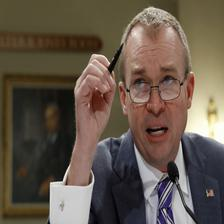

In [16]:
Image.open(test_image_file)